In [87]:
import os
import torch
import numpy as np
from PIL import Image, ImageDraw
from facenet_pytorch import MTCNN, InceptionResnetV1

In [2]:
# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [6]:
img_path = r"C:\Users\USER\Desktop\KungFuPanda\p1.jpg"
img = Image.open(img_path)

In [13]:
mtcnn = MTCNN(keep_all=True)
boxes, probs, points = mtcnn.detect(img, landmarks=True)

TypeError: detect() got an unexpected keyword argument 'save_path'

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from facenet_pytorch import extract_face

In [11]:
img_draw = img.copy()
draw = ImageDraw.Draw(img_draw)
for i, (box, point) in enumerate(zip(boxes, points)):
    draw.rectangle(box.tolist(), width=5)
    for p in point:
        draw.rectangle((p-10).tolist()+(p+10).tolist(), width=10)

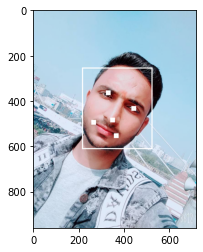

In [12]:
plt.imshow(img_draw)

In [89]:
img = Image.open("./images/my_data/michael_1.jpg")
face_tensor = mtcnn(img, save_path="./images/m.d/michael_2.jpg", return_prob=False)

In [55]:
face_tensor.dtype

torch.float32

In [54]:
encoding = resnet(face_tensor)

In [56]:
encoding.shape

torch.Size([1, 512])

## Exercise from deeplearning.ai

In [71]:
def img_to_encoding(img_path, model):
    img = Image.open(img_path)
    img_arr = np.array(img, dtype=np.float32) 
    img_tensor = torch.from_numpy(img_arr)
    img_tensor = img_tensor.permute(2,0,1)[:3]
    encoding = model(img_tensor.unsqueeze(0))
    return encoding
    #return img_tensor

In [74]:
database = {}
database["danielle"] = img_to_encoding("images/dl.ai/danielle.png", resnet)
database["younes"] = img_to_encoding("images/dl.ai/younes.jpg", resnet)
database["tian"] = img_to_encoding("images/dl.ai/tian.jpg", resnet)
database["andrew"] = img_to_encoding("images/dl.ai/andrew.jpg", resnet)
database["kian"] = img_to_encoding("images/dl.ai/kian.jpg", resnet)
database["dan"] = img_to_encoding("images/dl.ai/dan.jpg", resnet)
database["sebastiano"] = img_to_encoding("images/dl.ai/sebastiano.jpg", resnet)
database["bertrand"] = img_to_encoding("images/dl.ai/bertrand.jpg", resnet)
database["kevin"] = img_to_encoding("images/dl.ai/kevin.jpg", resnet)
database["felix"] = img_to_encoding("images/dl.ai/felix.jpg", resnet)
database["benoit"] = img_to_encoding("images/dl.ai/benoit.jpg", resnet)
database["arnaud"] = img_to_encoding("images/dl.ai/arnaud.jpg", resnet)

## Face Verification

In [78]:
def verify(image_path, identity, database, model):
    """
    Function that verifies if the person on the "image_path" image is "identity".
    
    Arguments:
    image_path -- path to an image
    identity -- string, name of the person you'd like to verify the identity. Has to be an employee who works in the office.
    database -- python dictionary mapping names of allowed people's names (strings) to their encodings (vectors).
    model -- your Inception model instance in Keras
    
    Returns:
    dist -- distance between the image_path and the image of "identity" in the database.
    door_open -- True, if the door should open. False otherwise.
    """
    
    ### START CODE HERE ###
    # Step 1: Compute the encoding for the image. Use img_to_encoding() see example above. (≈ 1 line)
    encoding = img_to_encoding(image_path, model)
    
    # Step 2: Compute distance with identity's image (≈ 1 line)
    diff = encoding - database[identity]
    dist = np.linalg.norm(diff.detach().numpy())
    
    # Step 3: Open the door if dist < 0.7, else don't open (≈ 3 lines)
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
        
    ### END CODE HERE ###
        
    return dist, door_open

In [81]:
def plot_imgs(path1, path2):
    img1 = Image.open(path1)
    img2 = Image.open(path2)
    plt.subplot(121)
    plt.imshow(img1)
    plt.subplot(122)
    plt.imshow(img2)

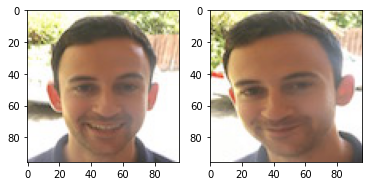

In [82]:
plot_imgs("images/dl.ai/camera_0.jpg", "images/dl.ai/younes.jpg")

In [79]:
verify("images/dl.ai/camera_0.jpg", "younes", database, resnet)

It's younes, welcome in!


(0.31891498, True)

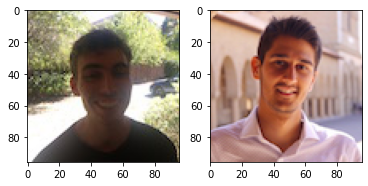

In [83]:
plot_imgs("images/dl.ai/camera_2.jpg", "images/dl.ai/kian.jpg")

In [84]:
verify("images/dl.ai/camera_2.jpg", "kian", database, resnet)

It's not kian, please go away


(0.78673893, False)

## Face Recognition

In [92]:
def who_is_it(image_path, database, model):
    """
    Implements face recognition for the office by finding who is the person on the image_path image.
    
    Arguments:
    image_path -- path to an image
    database -- database containing image encodings along with the name of the person on the image
    model -- your Inception model instance in Keras
    
    Returns:
    min_dist -- the minimum distance between image_path encoding and the encodings from the database
    identity -- string, the name prediction for the person on image_path
    """
    
    ### START CODE HERE ### 
    
    ## Step 1: Compute the target "encoding" for the image. Use img_to_encoding() see example above. ## (≈ 1 line)
    encoding = img_to_encoding(image_path, model)
    
    ## Step 2: Find the closest encoding ##
    
    # Initialize "min_dist" to a large value, say 100 (≈1 line)
    min_dist = 100
    
    # Loop over the database dictionary's names and encodings.
    for (name, db_enc) in database.items():
        
        # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)
        diff = encoding-db_enc
        dist = np.linalg.norm(diff.detach().numpy())

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            identity = name

    ### END CODE HERE ###
    
    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))
        
    return min_dist, identity

In [94]:
who_is_it("images/dl.ai/camera_0.jpg", database, resnet)

it's kian, the distance is 0.2757688


(0.2757688, 'kian')

## Testing on my data

In [88]:
#create 160*160 images
save_path = "images/m.d"
for file in os.listdir("./images/my_data"):
    img_ = Image.open(f"./images/my_data/{file}")
    face_tensor = mtcnn(img_, save_path=save_path+'/'+file, return_prob=False)

In [91]:
database["christianah"] = img_to_encoding("images/m.d/christianah.jpg", resnet)
database["mary"] = img_to_encoding("images/m.d/mary_01.jpg", resnet)
database["michael"] = img_to_encoding("images/m.d/michael.jpg", resnet)

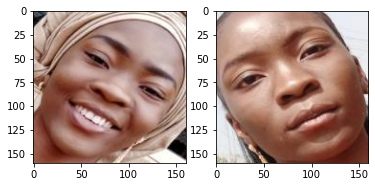

In [96]:
plot_imgs("images/m.d/christianah.jpg", "images/m.d/christianah_01.jpg")

In [98]:
verify("images/m.d/christianah_01.jpg", "christianah", database, resnet)

It's christianah, welcome in!


(0.41911298, True)

In [100]:
who_is_it("images/m.d/michael_2.jpg", database, resnet)

it's christianah, the distance is 0.36116952


(0.36116952, 'christianah')

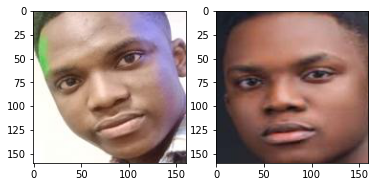

In [101]:
plot_imgs("images/m.d/michael.jpg", "images/m.d/michael_2.jpg")

In [102]:
verify("images/m.d/michael_2.jpg", "michael", database, resnet)

It's michael, welcome in!


(0.36621872, True)

In [103]:
who_is_it("images/m.d/michael_2.jpg", database, resnet)

it's christianah, the distance is 0.36116952


(0.36116952, 'christianah')

In [105]:
verify("images/m.d/mary_03.jpg", "mary", database, resnet)

It's mary, welcome in!


(0.36768717, True)

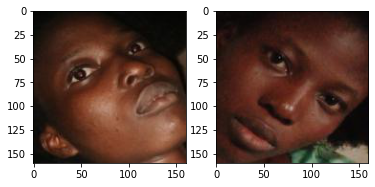

In [106]:
plot_imgs("images/m.d/mary_03.jpg", "images/m.d/mary_01.jpg")

In [107]:
who_is_it("images/m.d/mary_03.jpg", database, resnet)

it's mary, the distance is 0.36768717


(0.36768717, 'mary')